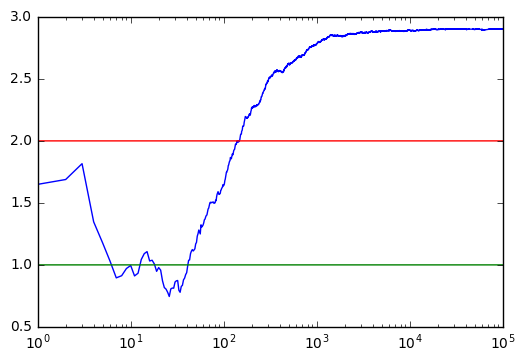

0.984603549213
1.99115560135
3.00381900026


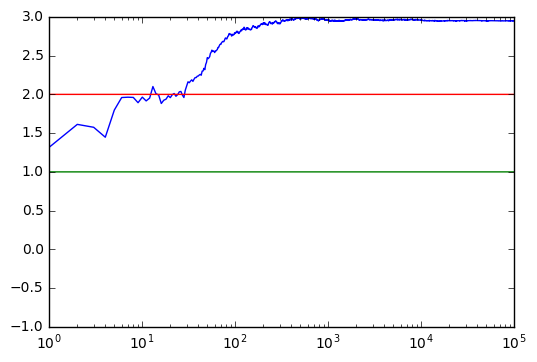

1.02153257719
1.99111462915
2.9987238098


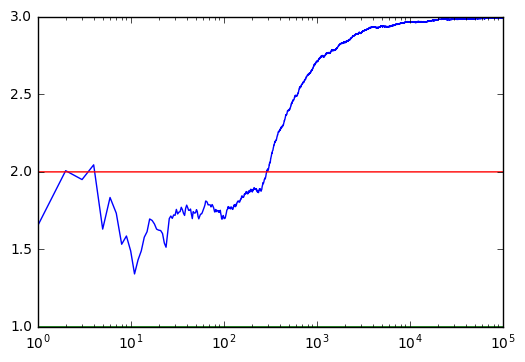

1.00420743916
1.95110412504
3.00390119441


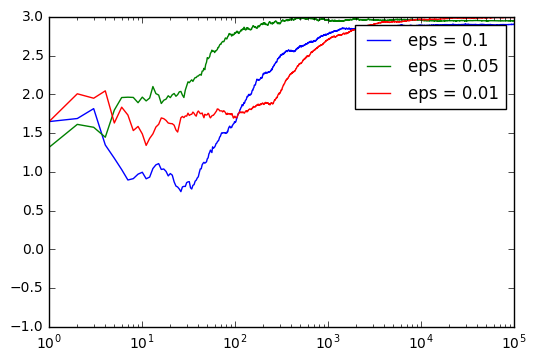

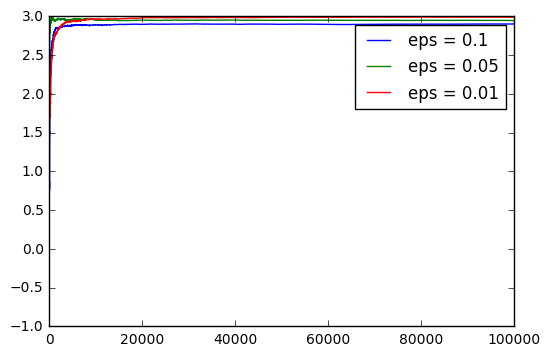

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# represents one bandit arm
class Bandit:
    def __init__(self, m):
        self.m = m # true mean
        self.mean = 0
        self.N = 0
    
    # simulates pulling the bandit's arm
    # is a Gaussian with unit variance
    def pull(self):
        value = np.random.randn() + self.m
#         print '\tpull value:', value
        return value
    
    # this is the update equation we just learned
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x
        
# N = number of times we play
# m1, m2, m3 = mean rewards for the 3 arms
# eps = epsilon for the epsilon greedy strategy
def run_experiment(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in xrange(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
#         print 'eps:', eps, 'selected:', j
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # plot moving average reward
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print b.mean
    
    return cumulative_average

c_1 = run_experiment(1.0, 2.0, 3.0, 0.1, 100000)
c_05 = run_experiment(1.0, 2.0, 3.0, 0.05, 100000)
c_01 = run_experiment(1.0, 2.0, 3.0, 0.01, 100000)

# log scale plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.xscale('log')
plt.show()

# linear plot
plt.plot(c_1, label='eps = 0.1')
plt.plot(c_05, label='eps = 0.05')
plt.plot(c_01, label='eps = 0.01')
plt.legend()
plt.show()


In [35]:
import numpy as np
sum = 0.0;
N = 100
for i in xrange(N):
    rnd = np.random.random()
    sum += rnd
print 'sum:', sum/N

sum: 0.507273969797


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from omparing_epsilons import run_experiment as run_experiment_eps

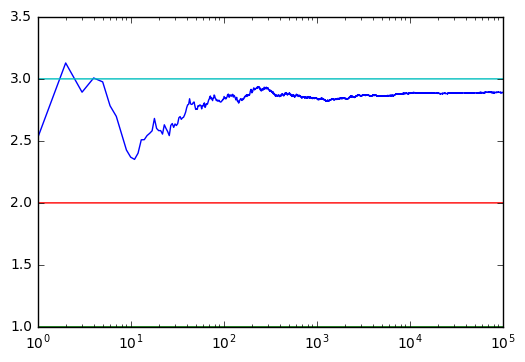

0.985927692576
1.99189530757
2.99106784241


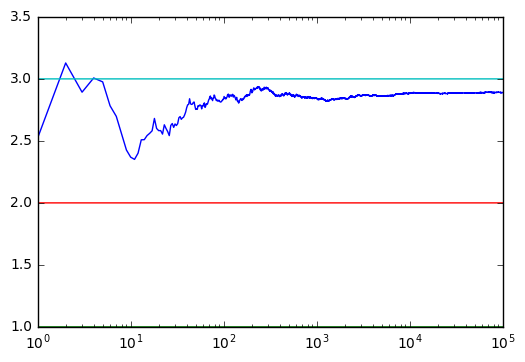

0.536569094257
0.628085956645
2.99990170534


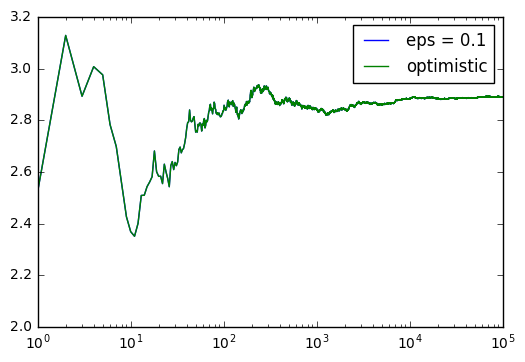

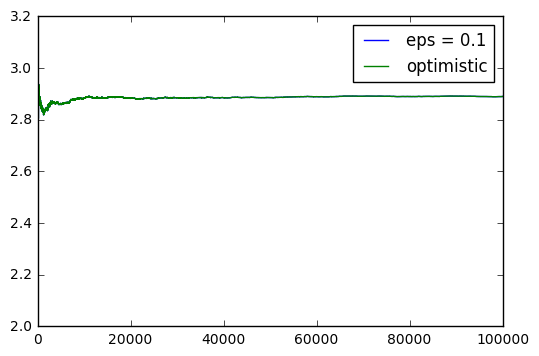

In [44]:
# https://deeplearningcourses.com/c/artificial-intelligence-reinforcement-learning-in-python
# https://www.udemy.com/artificial-intelligence-reinforcement-learning-in-python
import numpy as np
import matplotlib.pyplot as plt
# from comparing_epsilons import run_experiment as run_experiment_eps


class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 10
        self.N = 0

    def pull(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

def run_experiment_eps(m1, m2, m3, eps, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    for i in xrange(N):
        # epsilon greedy
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([b.mean for b in bandits])
#         print 'eps:', eps, 'selected:', j
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    # plot moving average reward
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print b.mean
    
    return cumulative_average

def run_experiment(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
  
    for i in xrange(N):
        # optimistic initial values
        j = np.argmax([b.mean for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

    # for the plot
    data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()

    for b in bandits:
        print b.mean

    return cumulative_average

if __name__ == '__main__':
    c_1 = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 100000)
    oiv = run_experiment(1.0, 2.0, 3.0, 100000)

    # log scale plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.xscale('log')
    plt.show()


    # linear plot
    plt.plot(c_1, label='eps = 0.1')
    plt.plot(oiv, label='optimistic')
    plt.legend()
    plt.show()
